In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/COLAB Files/House_prediction.csv')

In [3]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [5]:
df.floor = df.floor.replace(to_replace='-', value=0)

In [6]:
df.floor.dtype

dtype('O')

In [7]:
df.floor = df.floor.astype(str).astype(int)

In [8]:
df.floor.dtype

dtype('int64')

In [9]:
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [10]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [11]:
df.city.value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

In [12]:
df.city.unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [13]:
dfsao = df

In [14]:
cit = df.groupby("city").mean()

In [15]:
cit

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,,
Belo Horizonte,207.411765,3.020668,2.402226,1.955485,3.860890,2324.197138,3664.127981,272.782194,53.675676,6315.242448
Campinas,137.561547,2.355217,1.960141,1.558030,4.280188,628.922626,2364.290739,147.657679,32.388042,3173.276671
Porto Alegre,103.609388,2.140821,1.725901,1.044426,3.918692,491.618609,2337.699916,124.021794,36.425817,2989.782900
Rio de Janeiro,105.347768,2.243837,1.756163,0.744171,5.250500,1079.432378,3232.904064,256.853431,42.483011,4611.684877
São Paulo,158.899439,2.558859,2.467641,1.877527,5.626465,1169.627994,4652.793783,495.701716,62.428911,6380.831833


In [16]:
cit = cit.reset_index()
cit

,city,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,Belo Horizonte,207.411765,3.020668,2.402226,1.955485,3.860890,2324.197138,3664.127981,272.782194,53.675676,6315.242448
1,Campinas,137.561547,2.355217,1.960141,1.558030,4.280188,628.922626,2364.290739,147.657679,32.388042,3173.276671
2,Porto Alegre,103.609388,2.140821,1.725901,1.044426,3.918692,491.618609,2337.699916,124.021794,36.425817,2989.782900
3,Rio de Janeiro,105.347768,2.243837,1.756163,0.744171,5.250500,1079.432378,3232.904064,256.853431,42.483011,4611.684877
4,São Paulo,158.899439,2.558859,2.467641,1.877527,5.626465,1169.627994,4652.793783,495.701716,62.428911,6380.831833


In [17]:
cit.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

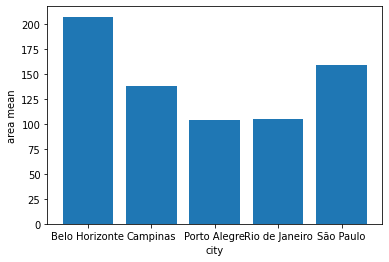

In [18]:
plt.bar(cit.city,cit.area)
plt.xlabel('city')
plt.ylabel('area mean')
plt.show()

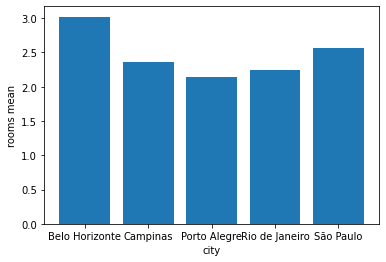

In [19]:
plt.bar(cit.city,cit.rooms)
plt.xlabel('city')
plt.ylabel('rooms mean')
plt.show()

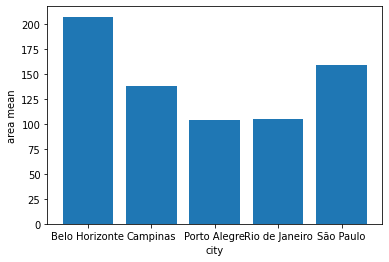

In [20]:
plt.bar(cit.city,cit.area)
plt.xlabel('city')
plt.ylabel('area mean')
plt.show()

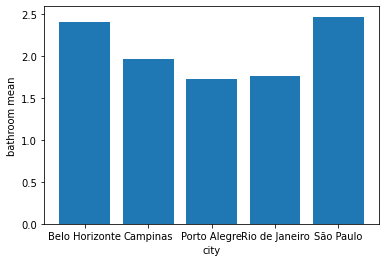

In [21]:
plt.bar(cit.city,cit.bathroom)
plt.xlabel('city')
plt.ylabel('bathroom mean')
plt.show()

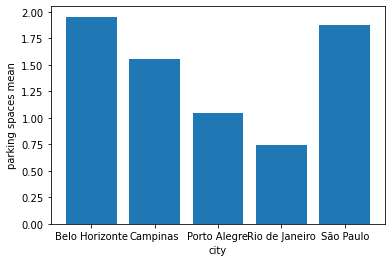

In [22]:
plt.bar(cit.city,cit["parking spaces"])
plt.xlabel('city')
plt.ylabel('parking spaces mean')
plt.show()

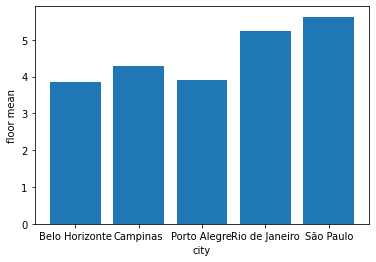

In [23]:
plt.bar(cit.city,cit.floor)
plt.xlabel('city')
plt.ylabel('floor mean')
plt.show()

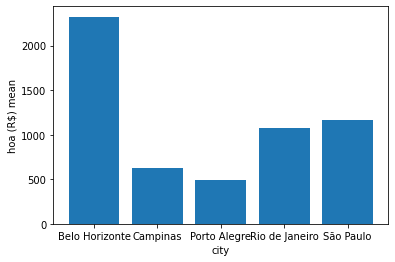

In [24]:
plt.bar(cit.city,cit["hoa (R$)"])
plt.xlabel('city')
plt.ylabel('hoa (R$) mean')
plt.show()

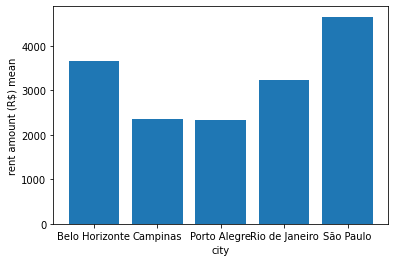

In [25]:
plt.bar(cit.city,cit["rent amount (R$)"])
plt.xlabel('city')
plt.ylabel('rent amount (R$) mean')
plt.show()

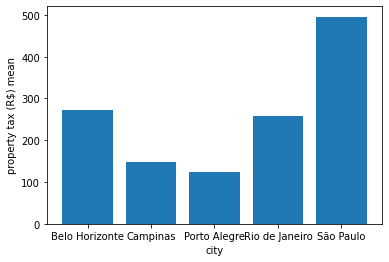

In [26]:
plt.bar(cit.city,cit["property tax (R$)"])
plt.xlabel('city')
plt.ylabel('property tax (R$) mean')
plt.show()

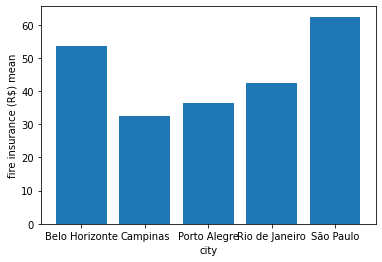

In [27]:
plt.bar(cit.city,cit["fire insurance (R$)"])
plt.xlabel('city')
plt.ylabel('fire insurance (R$) mean')
plt.show()

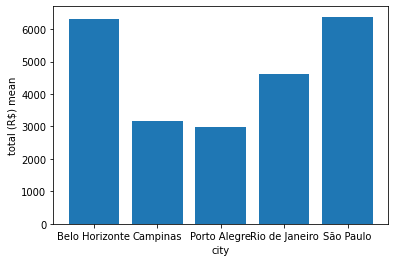

In [28]:
plt.bar(cit.city,cit["total (R$)"])
plt.xlabel('city')
plt.ylabel('total (R$) mean')
plt.show()

In [29]:
df.corr()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.009321,0.578361,0.098378,0.597348,0.148684
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.019872,0.073596,0.012626,0.013652,0.036431
hoa (R$),0.006890,0.007139,0.050271,0.009321,0.019872,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.073596,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.012626,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.013652,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.036431,0.955024,0.264490,0.218344,0.254911,1.000000


In [30]:
df.corr().style.background_gradient(cmap="Greys")

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.193796,0.226766,0.193983,-0.012724,0.006890,0.180742,0.039059,0.188078,0.051799
rooms,0.193796,1.000000,0.733763,0.617510,-0.078687,0.007139,0.541758,0.075252,0.565148,0.134597
bathroom,0.226766,0.733763,1.000000,0.697379,0.004894,0.050271,0.668504,0.109253,0.676399,0.208339
parking spaces,0.193983,0.617510,0.697379,1.000000,-0.020767,0.009321,0.578361,0.098378,0.597348,0.148684
floor,-0.012724,-0.078687,0.004894,-0.020767,1.000000,0.019872,0.073596,0.012626,0.013652,0.036431
hoa (R$),0.006890,0.007139,0.050271,0.009321,0.019872,1.000000,0.036490,0.007627,0.029535,0.955024
rent amount (R$),0.180742,0.541758,0.668504,0.578361,0.073596,0.036490,1.000000,0.107884,0.987343,0.264490
property tax (R$),0.039059,0.075252,0.109253,0.098378,0.012626,0.007627,0.107884,1.000000,0.105661,0.218344
fire insurance (R$),0.188078,0.565148,0.676399,0.597348,0.013652,0.029535,0.987343,0.105661,1.000000,0.254911
total (R$),0.051799,0.134597,0.208339,0.148684,0.036431,0.955024,0.264490,0.218344,0.254911,1.000000


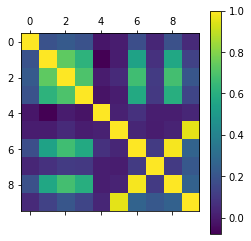

In [31]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()